# Introduction to Graph Analysis with `networkx`

Graph theory deals with various properties and algorithms concerned with Graphs.
Although it is very easy to implement a Graph library in Python, we will use
`networkx` library for Graph Analysis as it has inbuilt support for visualizing
graphs.

Please refer to the oficial documentation for more details and explanations:
[https://networkx.org/documentation/stable/tutorial.html](https://networkx.org/documentation/stable/tutorial.html)

## Importing the library

Throughout this tutorial, we assume that you have imported `networkx` as follows

In [1]:
import networkx as nx
# necessary for plots:
%matplotlib inline
import matplotlib.pyplot as plt

## Creating Graphs
Create an empty graph with no nodes and no edges.

In [2]:
G = nx.Graph()
G

By definition, a `Graph` is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g. a text string, an image, an XML object, another Graph, a customized node object, etc. (Note: Python's None object should not be used as a node as it determines whether optional function arguments have been assigned in many functions.)

In [3]:
print(G)

Graph with 0 nodes and 0 edges


## Adding nodes or edges

The graph `G` can be grown in several ways. NetworkX includes many graph generator functions and facilities to read and write graphs in many formats. To get started, we'll look at simple manipulations. You can add one node at a time,

In [4]:
G.add_node(1)

add a list of nodes,

In [5]:
G.add_nodes_from([2,3])

Nodes can be retreived using `G.nodes`

In [6]:
G.nodes

NodeView((1, 2, 3))

G can also be grown by adding one edge at a time:

In [7]:
G.add_edge(1,2)
e=(2,3)
G.add_edge(*e)  # Unpacking tuple

# Graph's edges can be accessed via
G.edges

EdgeView([(1, 2), (2, 3)])

We can add also build a graph by providing a list of edges:

In [8]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3)])

The graph G consists of 3 nodes and 2 edges, as can be seen by:

In [9]:
G.number_of_nodes()

3

In [10]:
G.number_of_edges()

2

In [11]:
print(G) # graphs can also be "printed"


Graph with 3 nodes and 2 edges


## Simple drawing

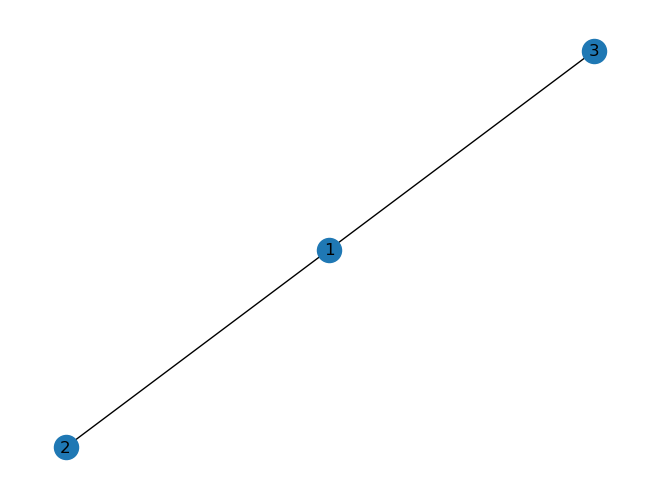

In [12]:
nx.draw(G, with_labels=True)

We can complete this graph by adding an edge between 2 and 3:

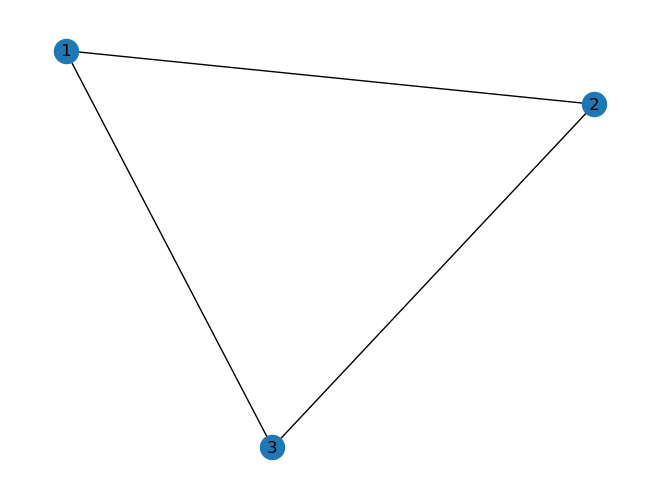

In [13]:
G.add_edge(2,3)

# And redraw:
nx.draw(G, with_labels=True)


## Accessing nodes and edges

In [14]:
G.nodes

NodeView((1, 2, 3))

In [15]:
G.edges

EdgeView([(1, 2), (1, 3), (2, 3)])

In [16]:
G.adj

AdjacencyView({1: {2: {}, 3: {}}, 2: {1: {}, 3: {}}, 3: {1: {}, 2: {}}})

Note that edges are given as `dict`, so they can be associated to any data attributes, for instance *weights*.

Fast direct access to the graph data structure is also possible using subscript notation:

In [17]:
G[1]

AtlasView({2: {}, 3: {}})

In [18]:
G[1][2]

{}

You can safely set the attributes of an edge using subscript notation if the edge already exists.

In [19]:
G[1][2]['weight'] = 10

In [20]:
G[1][2]

{'weight': 10}

In addition to the methods/attributes `Graph.nodes`, `Graph.edges`,
iterator versions (e.g. `Graph.edges_iter`) can save you from creating large
lists when you are just going to iterate through them anyway.

In [21]:
print(G.neighbors(1))

print(list(G.neighbors(1)))


[2, 3]


## Adding attributes to graphs, nodes, and edges

Attributes such as weights, labels, colors, or whatever Python object you like, can be attached to graphs, nodes, or edges.

Each graph, node, and edge can hold key/value attribute pairs in an associated attribute dictionary (the keys must be hashable). By default these are empty, but attributes can be added or changed using `add_edge`, `add_node` or direct manipulation of the attribute dictionaries named `G.graph`, `G.node` and `G.edge` for a graph `G`.

### Graph attributes

Assign graph attributes when creating a new graph

In [22]:
G = nx.Graph(day="Friday")
G.graph

{'day': 'Friday'}

Or you can modify attributes later

In [23]:
G.graph['day']='Monday'
G.graph

{'day': 'Monday'}

### Node attributes

Add node attributes using `add_node()`, `add_nodes_from()` or G.node

In [24]:
G.add_node(1,time = '5pm')

In [25]:
G.add_nodes_from([3], time='2pm')

In [26]:
G.nodes[1]

{'time': '5pm'}

In [27]:
G.nodes[1]['room'] = 714

In [28]:
G.nodes()

NodeView((1, 3))

In [29]:
G.nodes(data=True)

NodeDataView({1: {'time': '5pm', 'room': 714}, 3: {'time': '2pm'}})

Note that adding a node to `G.nodes` does not add it to the graph (since that's
a *read-only view*), use `G.add_node()` to add new nodes.

### Edge Attributes

Add edge attributes using `add_edge()`, `add_edges_from()`, subscript notation, or `G.edge`.

In [30]:
G.add_edge(1, 2, weight=4.7 )

In [31]:
G[1][2]

{'weight': 4.7}

In [32]:
G.add_edges_from([(3,4),(4,5)], color='red')

In [33]:
G.add_edges_from([(1,2,{'color':'blue'}), (2,3,{'weight':8})])

In [34]:
G[1][2]['weight'] = 4

In [35]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 4, 'color': 'blue'}), (3, 4, {'color': 'red'}), (3, 2, {'weight': 8}), (4, 5, {'color': 'red'})])

## Converting Graph to Adjacency matrix

You can use `nx.to_numpy_matrix(G)` to convert `G` to `numpy` matrix. If the
graph is weighted, the elements of the matrix are weights. If an edge doesn't
exsist, its value will be 0, not Infinity. You have to manually modify those
values to Infinity (`float('inf')`).

Seee doc on https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.to_numpy_array.html

In [36]:
nx.to_numpy_array(G)

array([[0., 0., 4., 0., 0.],
       [0., 0., 8., 1., 0.],
       [4., 8., 0., 0., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 0., 1., 0.]])

## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with Matplotlib as well as an interface to use the open source Graphviz software package are included. These are part of the networkx.drawing package and will be imported if possible

In [ ]:
import matplotlib.pyplot as plt

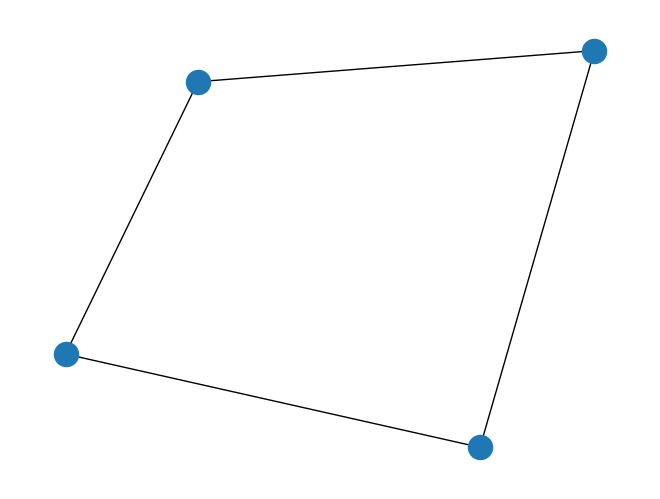

In [ ]:
nx.draw(FG)

Graphviz ([https://graphviz.org](https://graphviz.org/)) is a popular open
source graph visualization software. 

It can be used from Python using the module `pygraphviz` which must be installed
(eg using `pip install pygraphviz` or `conda install pygraphviz` depending on your
setup).

When `pygraphviz` is installed, `networkx` can use it directly to compute a better layout:

Text(0.5, 1.0, 'Graph, graphviz layout')

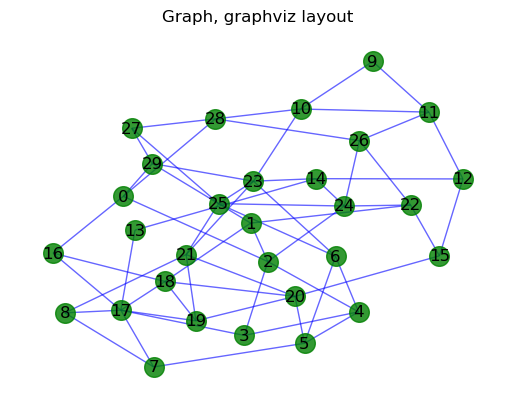

In [63]:
from networkx.drawing.nx_agraph import graphviz_layout
G = nx.watts_strogatz_graph(30, 4, 0.5) # A random graph with 30 nodes
pos = graphviz_layout(G, prog="neato")
plt.axis('off')
nx.draw_networkx_nodes(G, pos, node_color='g', alpha = 0.8, node_size=200)  # draws nodes
nx.draw_networkx_edges(G, pos, edge_color='b', alpha = 0.6)  # draws edges
nx.draw_networkx_edge_labels(G,pos,edge_labels = nx.get_edge_attributes(G,'weight')) # edge labels
_ = nx.draw_networkx_labels(G, pos) # node labels
plt.title("Graph, graphviz layout")

The choice between using Graphviz layouts (like `graphviz_layout`) and the default layout provided by `networkx.draw` largely depends on the specific requirements of your visualization and the characteristics of the graph you are working with. Both have their advantages:

1. **Default Layout (nx.draw)**:
   - The default layout (`nx.draw`) uses a force-directed layout (specifically, the Fruchterman-Reingold algorithm). This layout is often good for general purposes and is especially useful for illustrating the properties of certain types of networks like social networks, where the layout emphasizes the structure and clustering within the graph.
   - It's quick and easy to use, often requiring no additional setup or parameters.
   - Best for: Simplicity and convenience, especially for smaller or moderately complex graphs.

2. **Graphviz Layouts (graphviz_layout)**:
   - Graphviz provides a variety of sophisticated layout algorithms (like `dot`, `neato`, `fdp`, `sfdp`, `twopi`, `circo`), each tailored for different types of graph structures. These layouts can often produce more aesthetically pleasing and logically structured visualizations, especially for complex graphs.
   - Graphviz is particularly well-suited for hierarchical or tree-like graphs (using `dot`) and large or complex networks (using `sfdp` or `neato`).
   - Best for: More complex or specialized graph types where a specific layout algorithm is beneficial.

**Considerations**:
- **Complexity of Graph**: For simpler graphs, the default `nx.draw` is usually sufficient. For more complex graphs, especially those with hierarchical or layered structures, a Graphviz layout might produce a clearer representation.
- **Aesthetics**: Graphviz often yields more polished and sophisticated visualizations.
- **Installation**: Using Graphviz layouts in Python requires the installation of both the Graphviz software and the PyGraphviz or pydot library, which can be an extra step compared to the out-of-the-box functionality of NetworkX.

In summary, if you are working with a relatively simple graph or if you need a quick visualization, the default `nx.draw` method is a good choice. If you have a more complex graph or need a more structured layout, then using Graphviz with `graphviz_layout` is advisable.

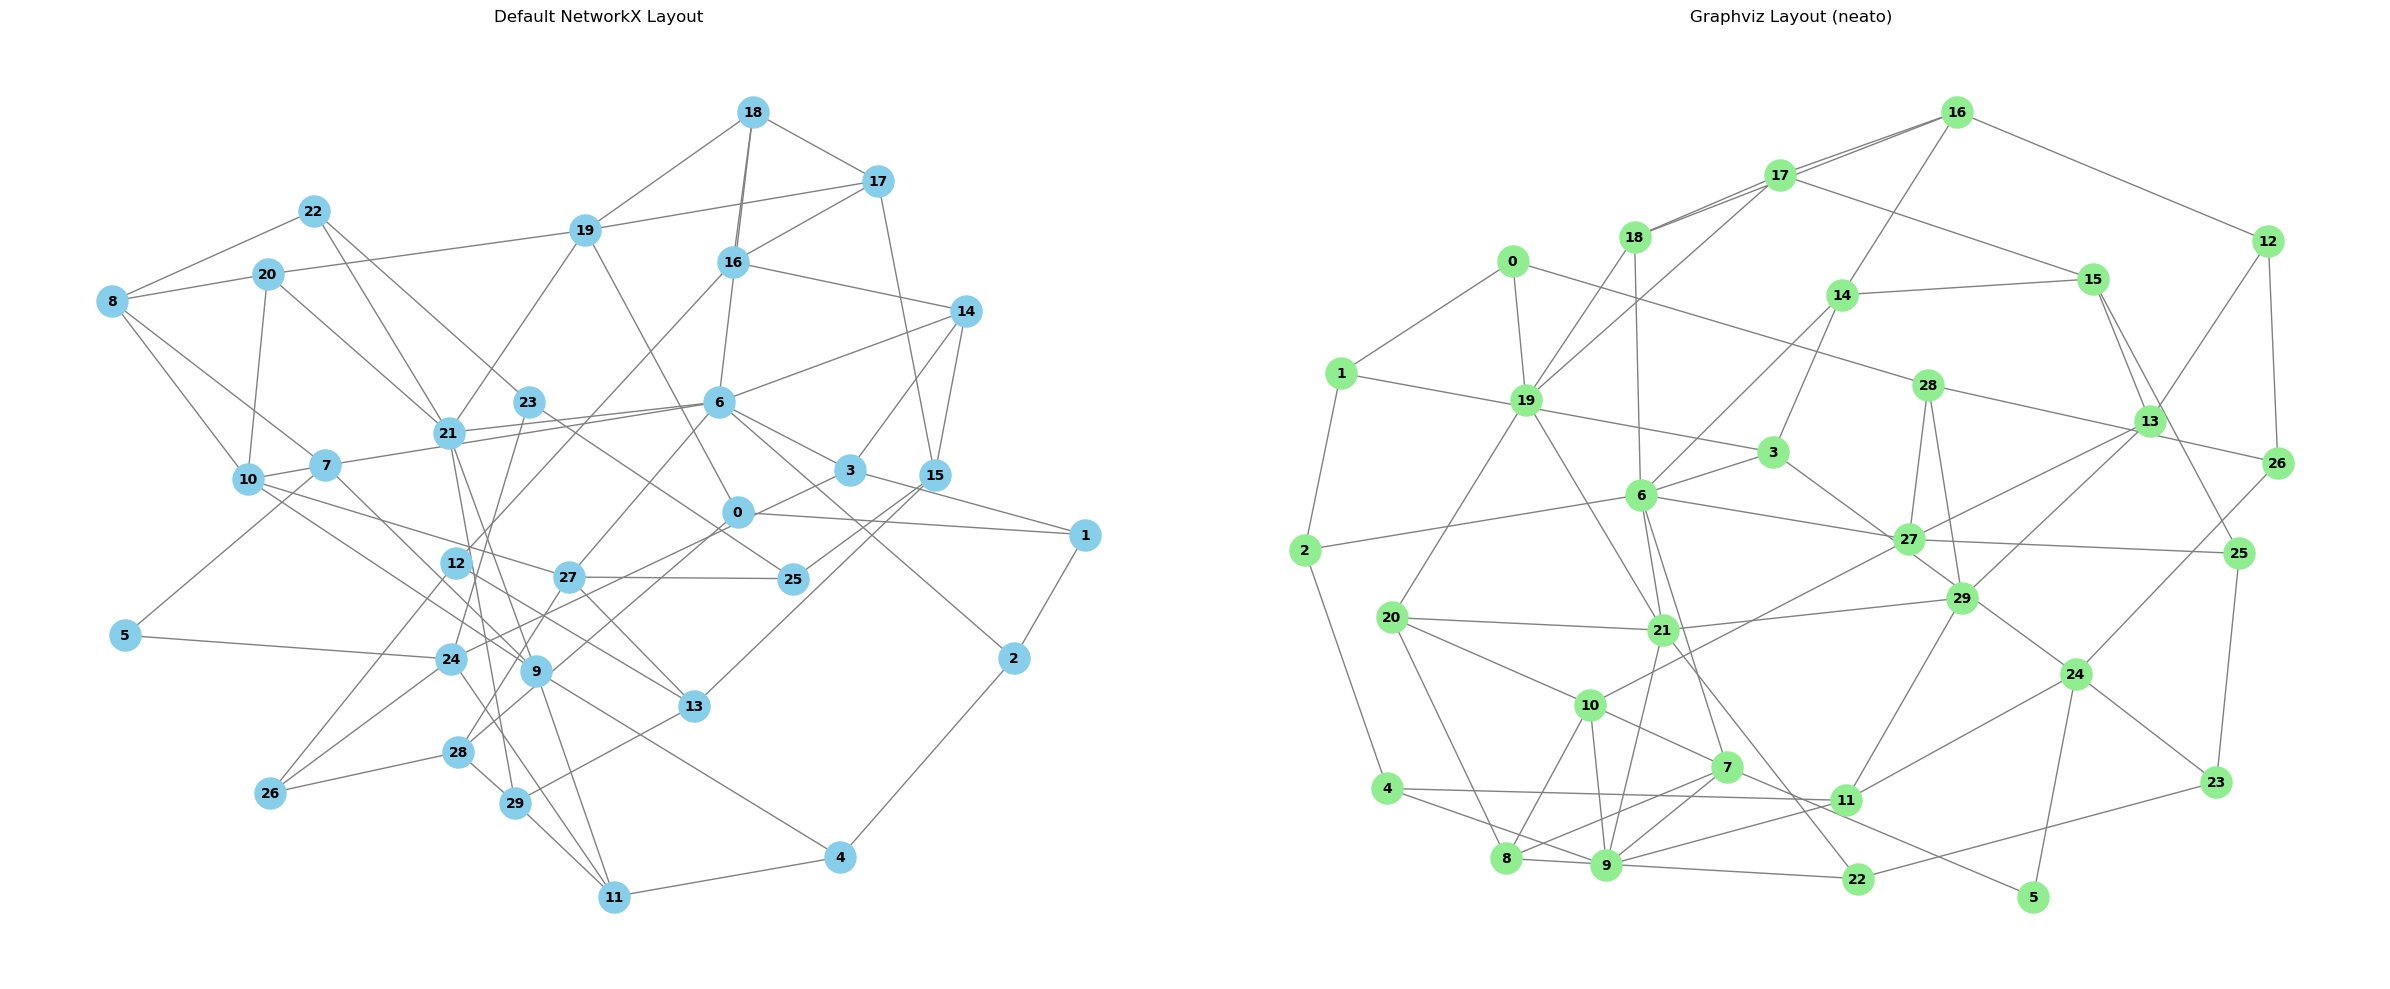

In [65]:
# Create a random graph
n, k, p = 30, 4, 0.5
G = nx.watts_strogatz_graph(n, k, p)

# Set up a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(24, 10))

# Draw graph with default NetworkX layout
nx.draw(G, ax=axes[0], with_labels=True, node_color='skyblue', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
axes[0].set_title("Default NetworkX Layout")

# Draw graph with Graphviz layout
pos_graphviz = graphviz_layout(G, prog="neato")
nx.draw(G, pos=pos_graphviz, ax=axes[1], with_labels=True, node_color='lightgreen', node_size=500, font_size=10, font_weight='bold', edge_color='gray')
axes[1].set_title("Graphviz Layout (neato)")

plt.tight_layout()
plt.show()


## Going Further

We have only seen the basic graph functionalities. In addition to this, NetworkX
provides many Graph Algorithms, and Many types of Graphs. Interested reader can
look at 

- the official documentation at [https://networkx.org/documentation/stable/reference](https://networkx.org/documentation/stable/reference)
- the Tutorial at [https://networkx.org/documentation/stable/tutorial.html](https://networkx.org/documentation/stable/tutorial.html).
